<a href="https://colab.research.google.com/github/nelslindahlx/KnowledgeReduce/blob/main/CivicHonorsKGv7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Summary

The code performs the following steps in Google Colab:

1. **Library Installation**: Installs essential libraries including `spacy` for NLP, and `networkx` for graph creation.
2. **NLP Model Initialization**: Loads SpaCy's large English model for accurate entity recognition.
3. **Entity Extraction**: Uses an NLP-based mapper function to extract entities from scraped website data.
4. **Data Aggregation**: A reducer function resolves conflicts, and a post-processing function validates extracted entities.
5. **Knowledge Graph Creation**: Aggregates and visualizes data in a knowledge graph, saving it in both GEXF and GraphML formats.
6. **Logging and Error Handling**: Implements robust error handling and logging for efficient debugging and maintenance.

# Step 1: Import Libraries and Initialize Logger

In [ ]:
!pip install spacy networkx matplotlib
!python -m spacy download en_core_web_lg

import requests
from bs4 import BeautifulSoup
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import os
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

2023-12-19 03:44:38.209654: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 03:44:38.209728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 03:44:38.211085: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 03:44:39.499597: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


# Step 2: Initialize NLP Model

In [ ]:
nlp = spacy.load("en_core_web_lg")

# Step 3: Enhanced Mapper Function

In [ ]:
def enhanced_mapper(document):
    doc = nlp(document)
    entities = [(ent.text.strip(), ent.label_) for ent in doc.ents if ent.text.strip()]
    return entities

# Step 4: Improved Reducer Function

In [ ]:
def improved_reducer(accumulated, new_value):
    for entity in new_value:
        if entity in accumulated:
            pass
        else:
            accumulated.add(entity)
    return accumulated

# Step 5: Post-Processing Function

In [ ]:
def post_process_extracted_data(data):
    validated_data = set()
    for entity in data:
        if validate_entity(entity):
            validated_data.add(entity)
        else:
            logger.info(f"Failed validation: {entity}")
    return validated_data

def validate_entity(entity):
    valid_types = ['PERSON', 'ORG', 'GPE', 'DATE', 'EVENT']
    return entity[1] in valid_types

# Step 6: Knowledge Reduction Function

In [ ]:
def knowledge_reduce(urls):
    accumulated_data = set()
    for url in urls:
        try:
            response = requests.get(url)
            if response.status_code == 200:
                entities = enhanced_mapper(response.text)
                entities = post_process_extracted_data(entities)
                accumulated_data = improved_reducer(accumulated_data, entities)
            else:
                logger.error(f"Error {response.status_code} fetching {url}")
        except requests.RequestException as e:
            logger.error(f"Request failed for {url}: {e}")
    return accumulated_data

# Step 7: Graph Creation, Visualization, and Export

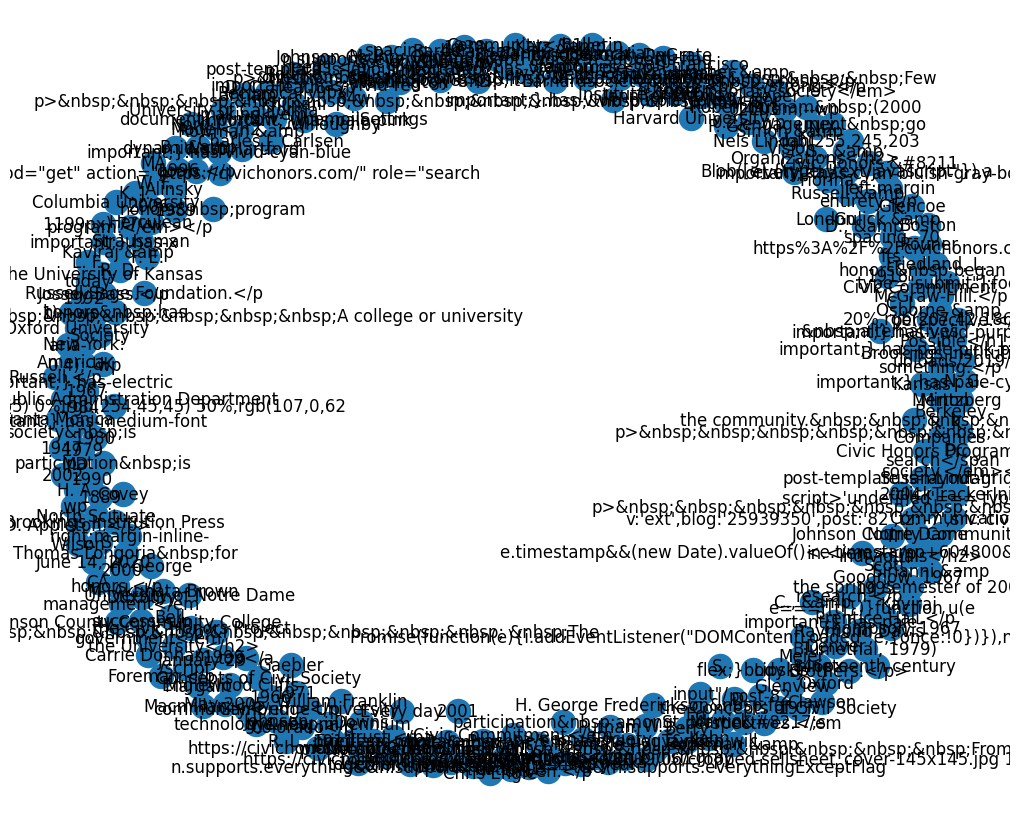

('/content/knowledge_graph.gexf', '/content/knowledge_graph.graphml')

In [ ]:
def create_visualize_and_export_graph(data, output_dir):
    try:
        G = nx.DiGraph()
        for entity in data:
            G.add_node(entity[0], label=entity[1])
        plt.figure(figsize=(10, 8))
        nx.draw(G, with_labels=True)
        plt.show()
        gexf_path = os.path.join(output_dir, "knowledge_graph.gexf")
        nx.write_gexf(G, gexf_path)
        logger.info(f"GEXF file saved to: {gexf_path}")
        graphml_path = os.path.join(output_dir, "knowledge_graph.graphml")
        nx.write_graphml(G, graphml_path)
        logger.info(f"GraphML file saved to: {graphml_path}")
        return gexf_path, graphml_path
    except Exception as e:
        logger.error("Failed to create, visualize, or export graph", exc_info=True)

output_dir = "/content"
os.makedirs(output_dir, exist_ok=True)
knowledge_data = knowledge_reduce(["https://civichonors.com/"])
create_visualize_and_export_graph(knowledge_data, output_dir)